### *Нужни библиотеки*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### *Зареждане на данните*

In [2]:
laptopbg = pd.read_csv('laptopbg_gpu_sku_prices.csv')
ardes = pd.read_csv('ardes_gpu_sku_prices.csv')
pcbuild = pd.read_csv('pcbuild_gpu_sku_prices.csv')

### *Събиране на данните в един DataFrame по SKU*

In [3]:
df = laptopbg.merge(ardes, how = 'inner', on = 'SKU').merge(pcbuild, how = 'inner', on = 'SKU')
df.head()

,SKU,Price_laptopbg,Price_ardes,Price_pcbuild
0,90YV0JC7-M0NA00,659,769,628.32
1,90YV0JC4-M0NA00,739,769,607.00
2,90YV0J49-M0NA00,879,999,800.00
3,90YV0MG0-M0NA00,1199,1211,1181.04
4,90YV0JJ1-M0NA00,1249,1349,1233.00


### *Проверка на броя съвпадения*

In [4]:
matches = len(df)
print(f"Брой съвпадения: {matches}")

Брой съвпадения: 81


### *Добавяне на нова колона, показваща сайта с най-добра цена за всеки продукт*

In [5]:
df['Cheapest'] = df.iloc[:,1:4].idxmin(axis = 1)
df['Cheapest'] = df['Cheapest'].str.replace('Price_', '')
df.head()

,SKU,Price_laptopbg,Price_ardes,Price_pcbuild,Cheapest
0,90YV0JC7-M0NA00,659,769,628.32,pcbuild
1,90YV0JC4-M0NA00,739,769,607.00,pcbuild
2,90YV0J49-M0NA00,879,999,800.00,pcbuild
3,90YV0MG0-M0NA00,1199,1211,1181.04,pcbuild
4,90YV0JJ1-M0NA00,1249,1349,1233.00,pcbuild


### *Построяване на графика*

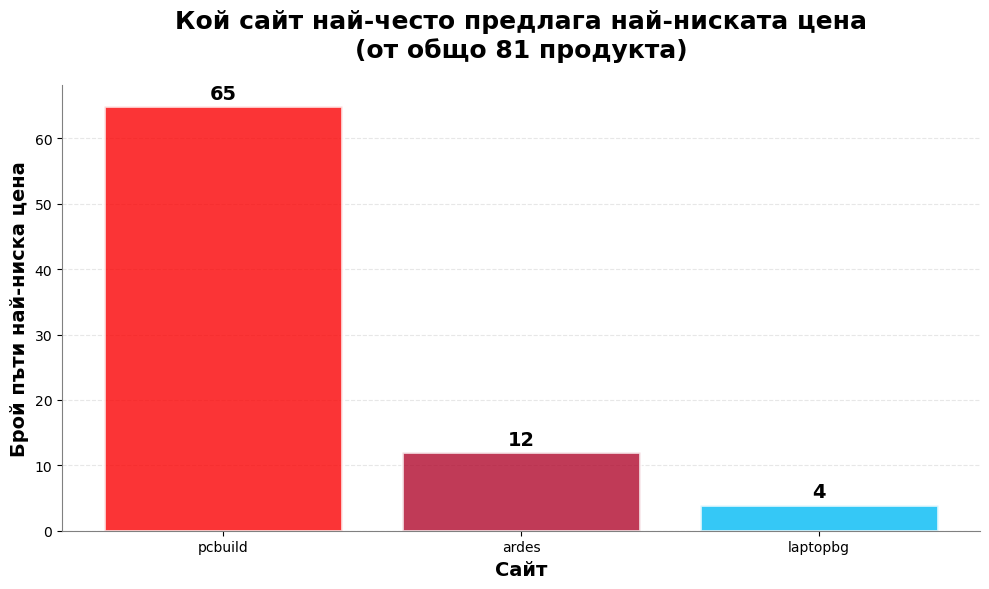

In [15]:
cheapest_counts = df['Cheapest'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#fb0103', '#b1092d', '#02bbf4']
bars = ax.bar(cheapest_counts.index, cheapest_counts, 
              color=colors, 
              alpha=0.8,
              edgecolor='white',
              linewidth=2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}',
            ha='center', va='bottom', 
            fontsize=14, fontweight='bold')

ax.set_title(f'Кой сайт най-често предлага най-ниската цена\n(от общо {matches} продукта)', 
             fontsize=18, fontweight='bold', pad=20)

ax.set_ylabel('Брой пъти най-ниска цена', fontsize=14, fontweight='bold')
ax.set_xlabel('Сайт', fontsize=14, fontweight='bold')

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

plt.tight_layout()
plt.savefig('best_priced_site_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# Извод

Сайтът, който най-често предлага най-добрата цена за видеокарти е ... PCBuild!

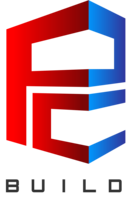